In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('FuelConsumptionCo2.csv')

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Select some features for regression

In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


Lets plot Emission values with respect to Engine size:### 

Text(0.5, 0, 'Engine Size')

Text(0, 0.5, 'Emission')

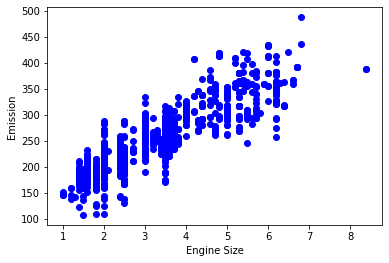

In [5]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

In [14]:
msk = np.random.rand(len(df))<0.8
train = cdf[msk]
test = cdf[~msk]

#### Train data distribution

Text(0.5, 0, 'Engine Size')

Text(0, 0.5, 'Emission')

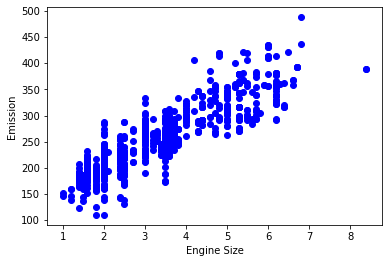

In [15]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

## Multiple Regression Model

In [18]:
from sklearn import linear_model
model = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
model.fit(x,y)
print('Coefficients:',model.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Coefficients: [[12.53169662  6.76262032  9.16312051]]


## prediction

In [20]:
y_hat = model.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))
print('Variance score: %.2f' % model.score(x, y))

Residual sum of squares: 541.75
Variance score: 0.87


In [25]:
msk1 = np.random.rand(3,2)

In [26]:
msk1

array([[0.98326003, 0.92856495],
       [0.21471055, 0.64455356],
       [0.81051334, 0.72060457]])

In [33]:
msk2 = np.random.rand(3,2)<0.8

In [34]:
msk2

array([[ True,  True],
       [ True,  True],
       [False,  True]])